In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isna().any()

v1    False
v2    False
dtype: bool

In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.shape

(5572, 2)

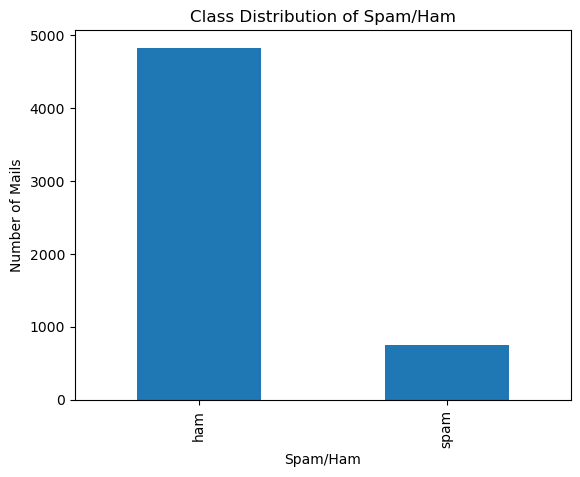

In [10]:
class_counts = df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [11]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mariy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.rename(columns={'v1': 'Class', 'v2': 'Text'}, inplace=True)
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.describe()

,Class,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df['length'] = df.Text.apply(len)
df.head()

,Class,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


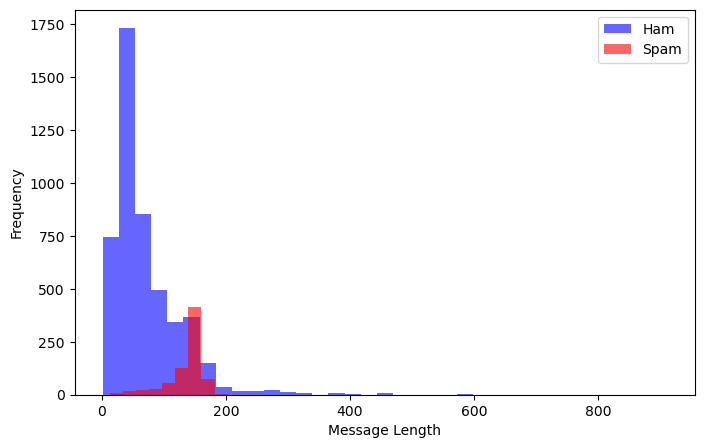

In [23]:
plt.figure(figsize=(8, 5))
df[df.Class == 'ham'].length.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
df[df.Class == 'spam'].length.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");

In [27]:
from nltk.stem import PorterStemmer

In [30]:
stop_words = stopwords.words('english')
print(stop_words[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [31]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [35]:
df['Text'] = df['Text'].apply(clean_text)
df.head()

,Class,Text,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in a wkly comp to win fa cup final ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i don t think he goes to usf he lives arou...,61


In [38]:
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(stemmer)

In [40]:
df.head()

,Class,Text,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkt st m...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61


In [42]:
X = df['Text']
y = df['Class']

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [51]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2210)
(1115, 2210)
(4457,)
(1115,)


In [70]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
model = LogisticRegression()

In [62]:
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
pred_y = model.predict(X_test)

In [66]:
pred_y

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [68]:
acc = accuracy_score(y_test, pred_y)
print("Accuracy:", acc)

Accuracy: 0.97847533632287


In [72]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       1.00      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [73]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [74]:
model_nb=MultinomialNB()

In [75]:
model_nb.fit(X_train,y_train)

MultinomialNB()

In [76]:
pred = model_nb.predict(X_test)

In [77]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [79]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

accuracy 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       949
        spam       0.97      0.92      0.94       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model_rf=RandomForestClassifier(n_estimators=50)

In [82]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [83]:
preds = model_rf.predict(X_test)

In [88]:
preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [87]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(y_test, preds))

accuracy 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       1.00      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [89]:
from sklearn.svm import LinearSVC

In [90]:
model_svm=LinearSVC()

In [92]:
model_svm.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [94]:
predict = model_svm.predict(X_test)

In [96]:
predict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [98]:
print('accuracy %s' % accuracy_score(predict, y_test))
print(classification_report(y_test, predict))

accuracy 0.9847533632286996
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.98      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [99]:
log_acc = accuracy_score(pred_y, y_test)
nb_acc = accuracy_score(pred, y_test)
rf_acc = accuracy_score(preds, y_test)
svm_acc = accuracy_score(predict, y_test)

In [100]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM'],
                      'Score': [log_acc, nb_acc, rf_acc,svm_acc]})

In [101]:
models

,Model,Score
0,Logistic Regression,0.978475
1,Naive Bayes,0.983857
2,Random Forest,0.978475
3,SVM,0.984753


In [102]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,SVM,0.984753
1,Naive Bayes,0.983857
0,Logistic Regression,0.978475
2,Random Forest,0.978475
